# Importing pandas library for data analysis and manipulation.


In [3]:
import pandas as pd


# Reading the CSV file 'BTCUSDT.csv' into a DataFrame named 'df_coin'.


In [20]:
df_coin = pd.read_csv("BTCUSDT.csv")

# Displaying the first 5 rows of the DataFrame 'df_coin' to inspect the loaded data.


In [21]:
df_coin.head()

,Date,Unnamed: 0,Open,High,Low,Close,Volume
0,2022-08-29,0.0,19555.61,20576.25,19540.00,20000.30,3.059723e+10
1,2022-09-05,1.0,20000.30,21860.00,18510.77,21826.87,4.346005e+10
2,2022-09-12,2.0,21826.87,22799.00,19320.01,19416.18,4.578415e+10
3,2022-09-19,3.0,19417.45,19956.00,18125.98,18807.38,4.348805e+10
4,2022-09-26,4.0,18809.13,20385.86,18471.28,19056.80,5.376117e+10


# Plotting a histogram of the 'Volume' column to visualize its distribution.


<Axes: >

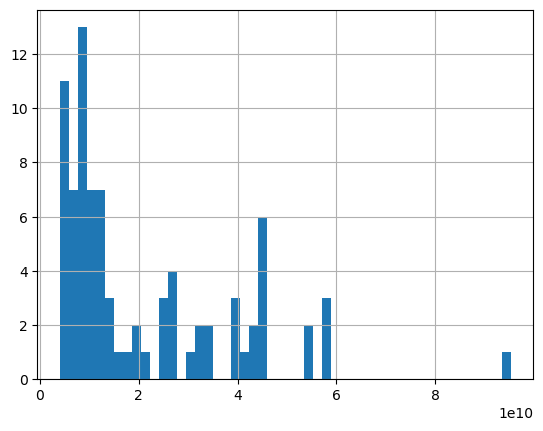

In [22]:
df_coin["Volume"].hist(bins=50)

# Converting the 'Date' column to datetime format and plotting a scatter plot of 'Date' vs 'Volume'.


<Axes: xlabel='Date', ylabel='Volume'>

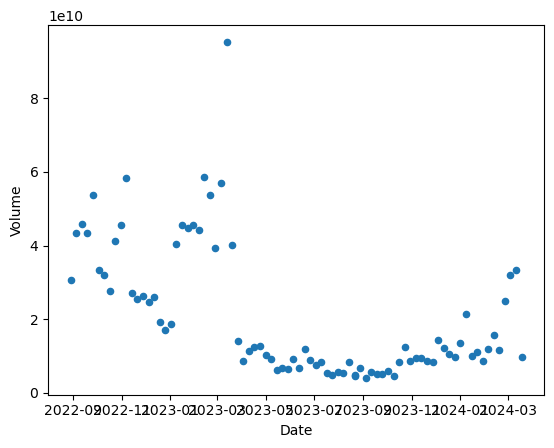

In [7]:
df_coin["Date"] = pd.to_datetime(df_coin["Date"] )
df_coin.plot.scatter(x="Date",y="Volume")

# Cleaning data 

# Displaying information about the DataFrame to check for null values and data types.


In [8]:
df_coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        83 non-null     datetime64[ns]
 1   Unnamed: 0  52 non-null     float64       
 2   Open        83 non-null     float64       
 3   High        83 non-null     float64       
 4   Low         83 non-null     float64       
 5   Close       83 non-null     float64       
 6   Volume      83 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.7 KB


*  remove data not relationship in the data


# Dropping the 'Unnamed: 0' column from the DataFrame as it is not needed.


In [25]:
df_coin.drop("Unnamed: 0",axis=1,inplace=True)
df_coin

,Date,Open,High,Low,Close,Volume
0,2022-08-29,19555.61,20576.25,19540.00,20000.30,3.059723e+10
1,2022-09-05,20000.30,21860.00,18510.77,21826.87,4.346005e+10
2,2022-09-12,21826.87,22799.00,19320.01,19416.18,4.578415e+10
3,2022-09-19,19417.45,19956.00,18125.98,18807.38,4.348805e+10
4,2022-09-26,18809.13,20385.86,18471.28,19056.80,5.376117e+10
...,...,...,...,...,...,...
78,2024-02-19,52137.68,52985.00,50521.00,51728.85,1.151959e+10
79,2024-02-26,51728.85,64000.00,50901.44,63113.97,2.488479e+10
80,2024-03-04,63113.97,69990.00,59005.00,68955.88,3.204890e+10
81,2024-03-11,68955.88,73777.00,64533.00,68393.48,3.340111e+10


* fill data null or drop them

# Filling null values in the 'Close' column with 'Unknown'.


In [26]:
df_coin.loc[df_coin['Close'].isna(), 'Close'] = 'Unknown'



# Importing numpy library for numerical operations.


In [27]:
import numpy as np

# Randomly assigning NaN to 20 values in the 'Close' column to simulate missing data.


In [28]:
df_coin.iloc[df_coin['Close'].sample(20,random_state=42).index,4] = np.nan


# Checking the count of missing values in the DataFrame.


In [29]:
df_coin.isna().value_counts()

Date   Open   High   Low    Close  Volume
False  False  False  False  False  False     63
                            True   False     20
dtype: int64

# Importing KNNImputer from sklearn to handle missing data imputation.


In [30]:
from sklearn.impute import KNNImputer
knn_model = KNNImputer() 
df_coin2 = knn_model.fit_transform(df_coin.iloc[:,1:5])

* Outliers

# Defining a function to remove outliers from a specified column using the IQR method.


In [37]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75) 
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column]<upper_boundary)] 
    return new_df

# Applying the remove_outliers function to the 'Close' column.


In [38]:
remove_outliers(df_coin, 'Close')

,Date,Open,High,Low,Close,Volume,ruler_Close
1,2022-09-05,20000.30,21860.00,18510.77,21826.87,4.346005e+10,1991126.238002
2,2022-09-12,21826.87,22799.00,19320.01,19416.18,4.578415e+10,2358041.171458
3,2022-09-19,19417.45,19956.00,18125.98,18807.38,4.348805e+10,2312286.444421
5,2022-10-03,19057.74,20475.00,18959.68,19439.02,3.349847e+10,1723259.16064
6,2022-10-10,19439.96,19951.87,18190.00,19262.98,3.197329e+10,1659830.682486
7,2022-10-17,19262.98,19706.66,18650.00,19570.4,2.772609e+10,1416735.858731
8,2022-10-24,19570.40,21085.00,19157.00,20627.48,4.116310e+10,1995546.875833
9,2022-10-31,20627.48,21480.65,20031.24,20905.58,4.558928e+10,2180722.893378
11,2022-11-14,16331.78,17190.00,15815.21,16280.23,2.707747e+10,1663211.752703
13,2022-11-28,16428.77,17324.00,15995.27,17105.7,2.636016e+10,1541016.242732


# Calculating the first quartile (Q1) of the 'Close' column.


In [33]:
df_coin["Close"].quantile(0.25) 

21911.989999999998

# Creating a new column 'ruler_Close' that represents the ratio of 'Volume' to 'Close'.


In [39]:
df_coin['ruler_Close'] = df_coin['Volume'] / df_coin['Close']  
df_coin

,Date,Open,High,Low,Close,Volume,ruler_Close
0,2022-08-29,19555.61,20576.25,19540.00,NaN,3.059723e+10,NaN
1,2022-09-05,20000.30,21860.00,18510.77,21826.87,4.346005e+10,1991126.238002
2,2022-09-12,21826.87,22799.00,19320.01,19416.18,4.578415e+10,2358041.171458
3,2022-09-19,19417.45,19956.00,18125.98,18807.38,4.348805e+10,2312286.444421
4,2022-09-26,18809.13,20385.86,18471.28,NaN,5.376117e+10,NaN
...,...,...,...,...,...,...,...
78,2024-02-19,52137.68,52985.00,50521.00,51728.85,1.151959e+10,222691.817075
79,2024-02-26,51728.85,64000.00,50901.44,63113.97,2.488479e+10,394283.352461
80,2024-03-04,63113.97,69990.00,59005.00,68955.88,3.204890e+10,464774.027489
81,2024-03-11,68955.88,73777.00,64533.00,68393.48,3.340111e+10,488366.938801


# Creating a DataFrame to demonstrate the usage of apply and lambda functions.


In [47]:
df = pd.DataFrame(['metal','met'],columns=['Genre'])
genre_dict =  {'metal': 'Metal', 'met': 'Metal'} 
df['Genre'].replace(genre_dict)

0    Metal
1    Metal
Name: Genre, dtype: object

# Applying a lambda function to convert all entries in the 'Genre' column to lowercase.


In [48]:
df['Genre'].apply(lambda x: x.lower())

0    metal
1      met
Name: Genre, dtype: object

# Grouping the DataFrame by 'Volume', calculating the mean of 'Low', and displaying the smallest values.


In [54]:
df_coin.groupby('Volume').mean(numeric_only=True)["Low"].sort_values().head()


Volume
2.550677e+10    15476.00
5.848194e+10    15588.00
2.707747e+10    15815.21
2.636016e+10    15995.27
1.926187e+10    16256.30
Name: Low, dtype: float64

# Saving the DataFrame to a new CSV file 'saved_itunes_data.csv' without the index column.


In [56]:
df_coin.to_csv('saved_itunes_data.csv', index=False) 